In [1]:
from helper import Search, query, connections

In [2]:
def search():
    return Search("elastipy-example-commits-pandas")

### activity

#### commits per week

<AxesSubplot:xlabel='date'>

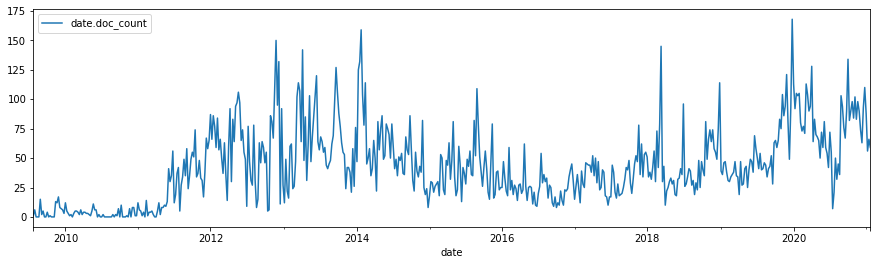

In [3]:
s = search()
agg = s.agg_date_histogram("date", calendar_interval="week")
agg.execute().df(to_index=True).plot(figsize=(15,4))

#### additions/deletions per week

<AxesSubplot:xlabel='date'>

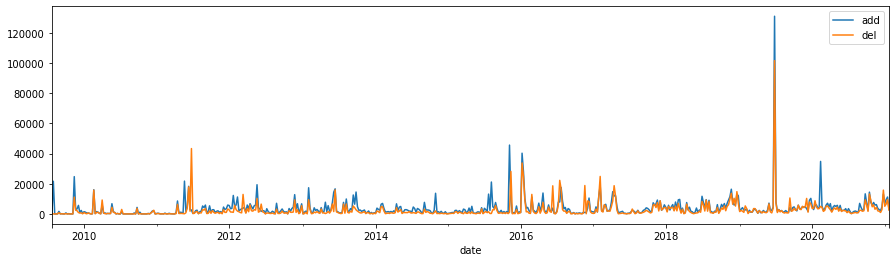

In [4]:
s = search()
agg = s.agg_date_histogram("date", calendar_interval="week")
agg.metric_sum("add", field="changes.additions")
agg.metric_sum("del", field="changes.deletions")
agg.execute().plot.line(x="date", y=["add", "del"], figsize=(15,4))

### authors

#### top 3 authors per year

<AxesSubplot:xlabel='a0'>

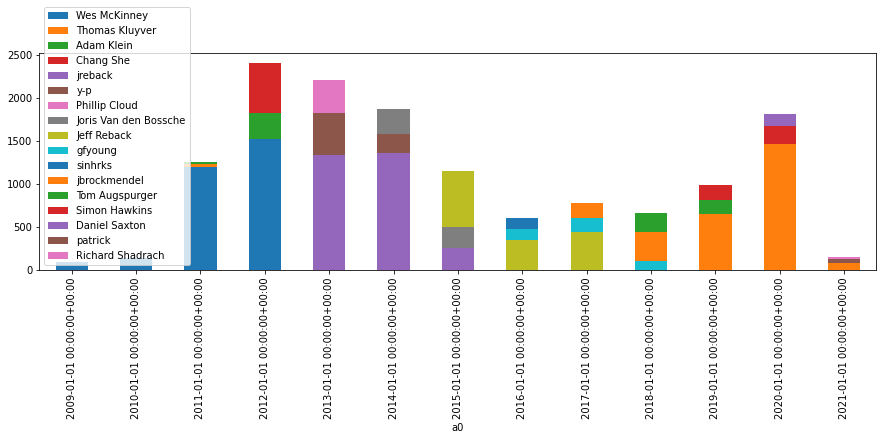

In [5]:
s = search()
agg = s.agg_date_histogram(calendar_interval="year")
agg = agg.agg_terms("author", field="author", size=3)
agg.execute().df(to_index=True, flat="author", exclude="*doc_count").plot.bar(figsize=(15,4), stacked=True)

#### number of authors per year

all authors 2504


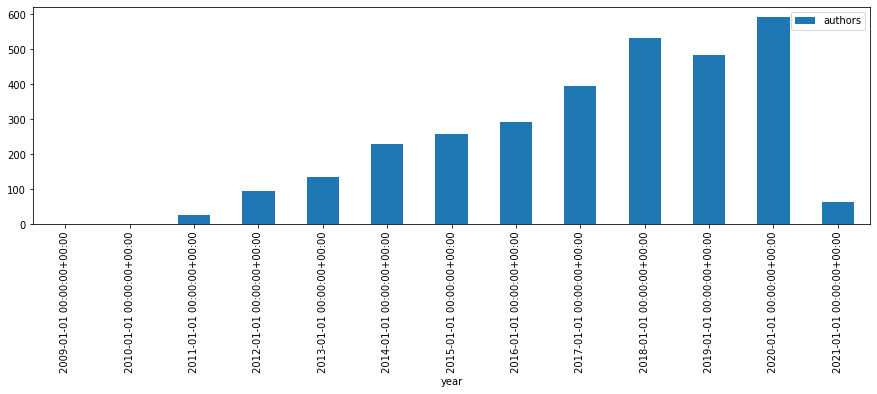

In [6]:
s = search()
global_authors = s.metric_cardinality(field="author", return_self=True)
agg = s.agg_date_histogram("year", calendar_interval="year")
agg = agg.metric_cardinality("authors", field="author")
agg.execute().plot.bar("year", "authors", figsize=(15,4), stacked=True)
print("all authors", next(global_authors.values()))

### messages

#### significant terms per year

<AxesSubplot:>

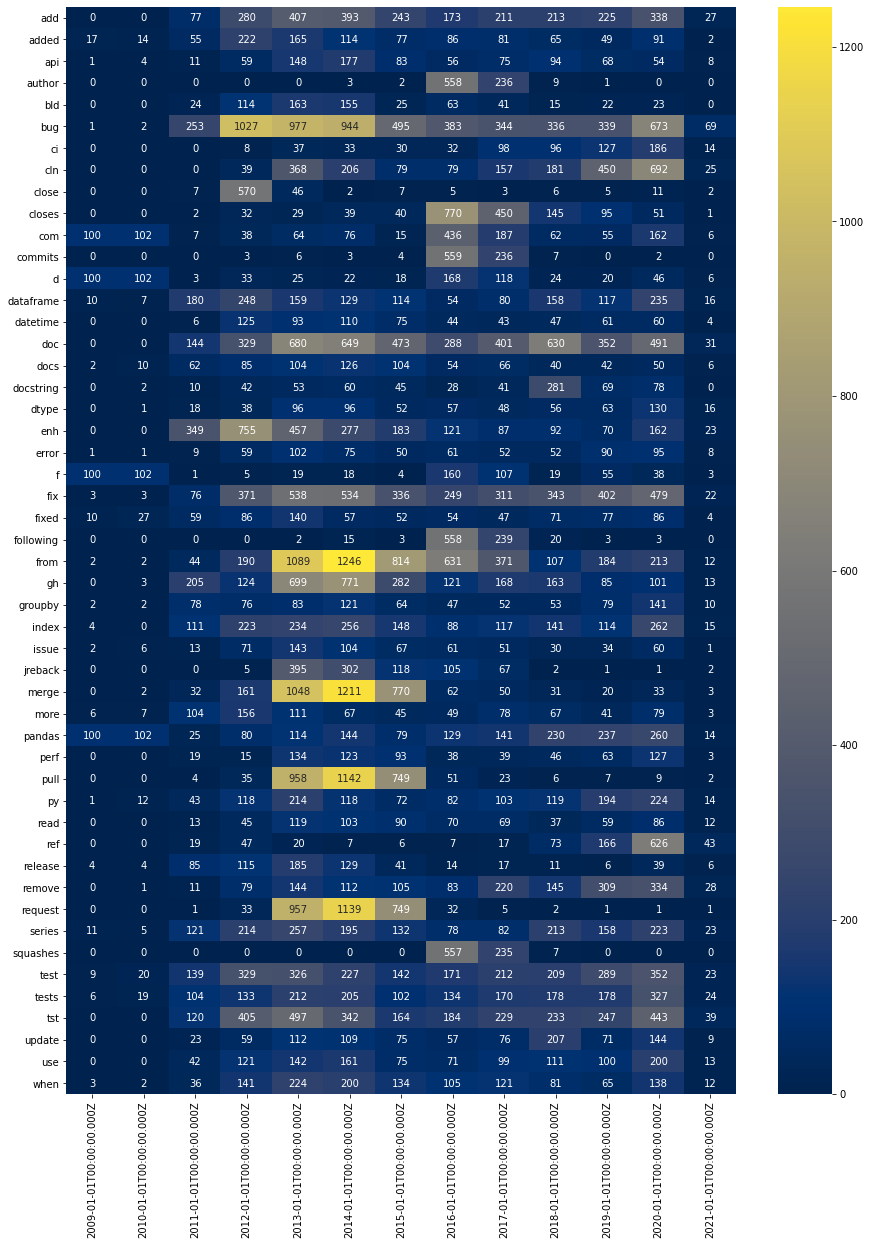

In [7]:
s = search()
keywords = set(s.copy().agg_significant_terms(field="message", size=30, shard_size=1000).execute().keys())
keywords |= set(s.copy().agg_significant_terms(field="message", size=30, shard_size=30000).execute().keys())
if not keywords:
    keywords = set(s.copy().agg_terms(field="message", size=50).execute().keys())

agg = s.agg_date_histogram("date", calendar_interval="year")
agg = agg.agg_filters("word", filters={key: query.Term("message", key) for key in keywords})
agg.execute().plot.heatmap(transpose=True, annot=True, fmt=".0f", figsize=(15, 20))

### files

#### overall top 50 edited files per year

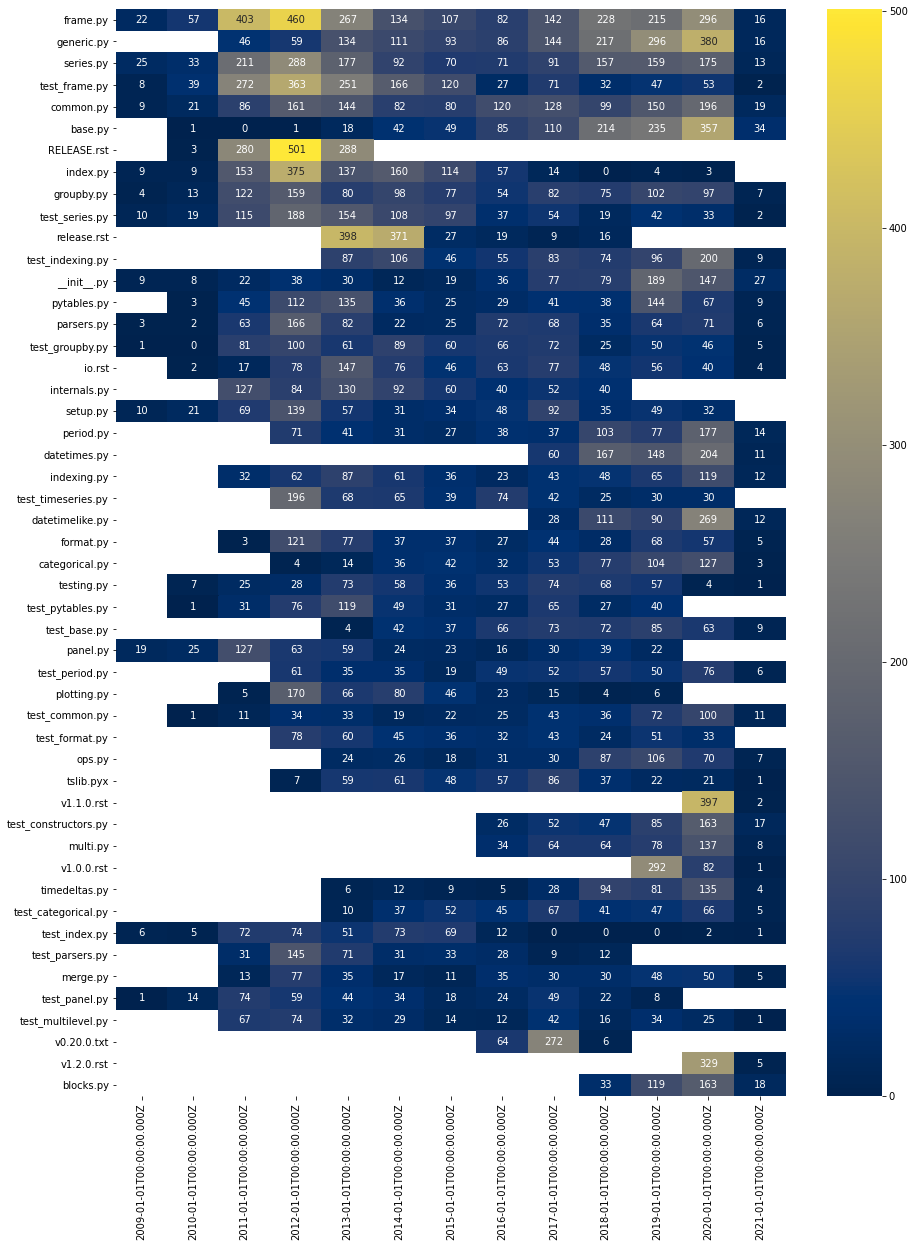

In [8]:
s = search()
agg = s.agg_terms(field="changes.file", size=50)
agg = agg.agg_date_histogram("date", calendar_interval="year")
df = agg.execute().plot.heatmap(annot=True, fmt=".0f", figsize=(15, 20))

<AxesSubplot:>

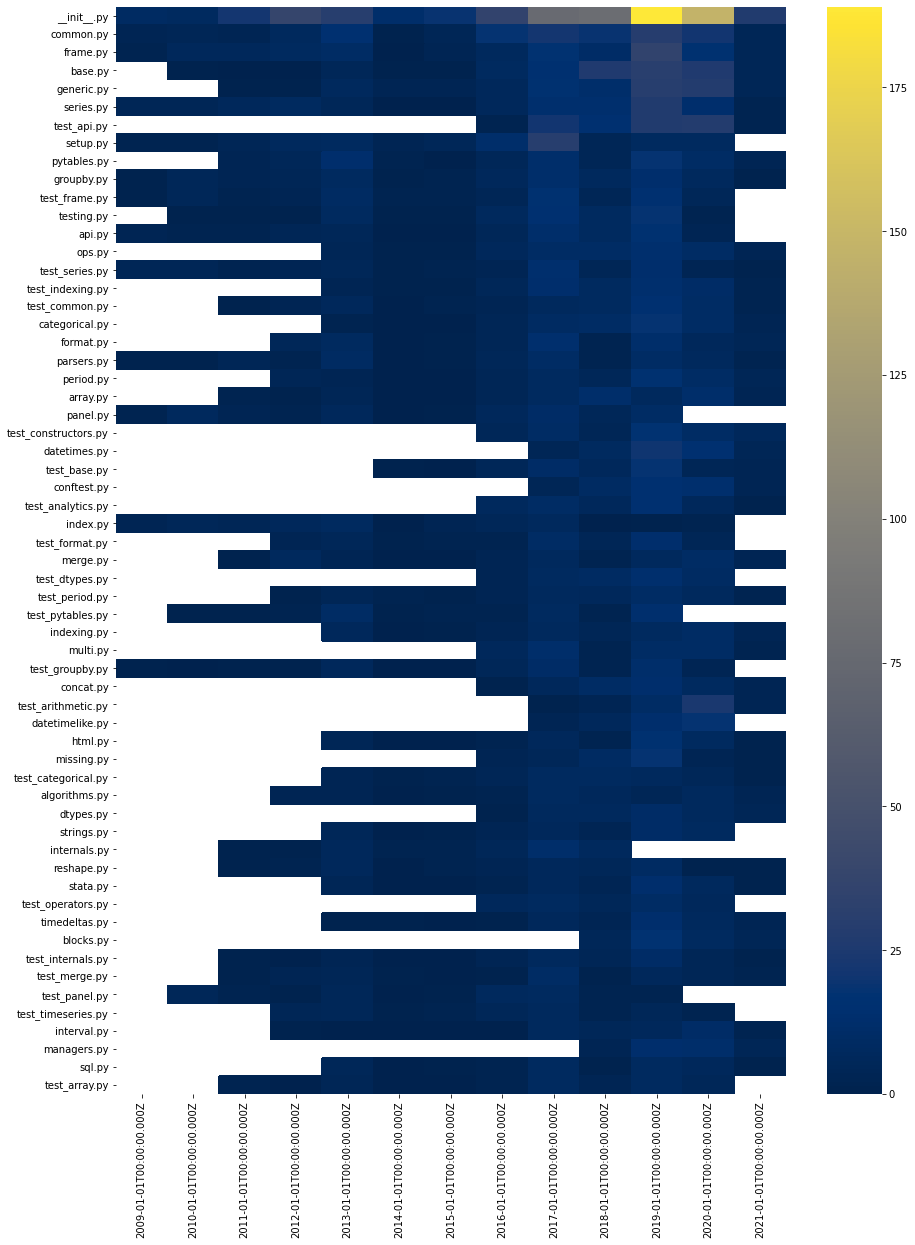

In [9]:
s = search()
s = s.query_string("changes.file: __init__.py")
agg = s.agg_terms(field="changes.file", size=60)
agg = agg.agg_date_histogram("date", calendar_interval="year")

agg.execute().plot.heatmap(figsize=(15, 20))


In [10]:
s = search()
s = s.match("message", "fix")
s.execute().dump.documents()

[
  {
    "hash": "8a9bc9ed7da669c9d391579a59da003b81539bb1",
    "author": "Adam Klein",
    "author_email": "adamklein@gmail.com",
    "timestamp": "2012-01-17T13:18:49-05:00",
    "message": "FIX: multiindex, comma fix\n",
    "changes": [
      {
        "filepath": "pandas/core/index.py",
        "file": "index.py",
        "additions": 1,
        "deletions": 1
      }
    ],
    "timestamp_hour": 13,
    "timestamp_weekday": "2 Tuesday",
    "project": "pandas"
  },
  {
    "hash": "68db2d26ddb5f95de4254d61b850d3dcaf6ce717",
    "author": "patrick",
    "author_email": "61934744+phofl@users.noreply.github.com",
    "timestamp": "2021-01-05T21:52:32-05:00",
    "message": "Fix bug on master (#38987)\n\n* Fix bug on master\n\n* Fix indent problem",
    "changes": [
      {
        "filepath": "doc/source/user_guide/io.rst",
        "file": "io.rst",
        "additions": 5,
        "deletions": 7
      },
      {
        "filepath": "pandas/tests/io/test_html.py",
        "file": "